<a href="https://colab.research.google.com/github/albertos-2002/SF3/blob/main/elettronica/esperienza_2/Curva_VTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import math

regrlin_pear_errpost_xys(input_x, input_y, input_sigma)

retta_fit_xba(x, b,a)

chi_quadro_lineare(y_vec, x_vec, sigma_vec, inte, pend, stringa_ytitle)

#Librerie

In [ ]:
def regrlin_pear_errpost_xys(input_x, input_y, input_sigma) :
  import math
  import sys
  #dati input
  x = list(input_x)
  y = list(input_y)
  sigma = list(input_sigma)
  dimensione = len(x)
  if len(x) != len(y):
    print("X E Y DIMENSIONE DIVERSA")
    sys.exit()
  if len(x) != len(sigma):
    print("X E SIGMA DIMENSIONE DIVERSA")
    sys.exit()
  #REGRESSIOBNE LINEARE
  #calcolo del delta
  parametro_1 = 0
  parametro_2 = 0
  parametro_3 = 0
  for i in range(dimensione): #primo termine del delta
    dummy_1 = 0
    dummy_1 = 1/ pow(sigma[i],2)
    parametro_1 = dummy_1 + parametro_1
  for i in range(dimensione): #secondo termine del delta
    dummy_2 = 0
    dummy_2 = pow(x[i],2) / pow(sigma[i],2)
    parametro_2 = dummy_2 + parametro_2
  dummy_3_1 = 0
  for i in range(dimensione): #terzo termine del delta
    dummy_3 = 0
    dummy_3 = x[i] / pow(sigma[i],2)
    dummy_3_1 = dummy_3 + dummy_3_1
  parametro_3 = pow(dummy_3_1,2)
  delta = (parametro_1*parametro_2) - parametro_3
  delta_1 = 1/delta
  #calcolo di b
  parametro_4 = 0
  parametro_5 = 0
  parametro_6 = 0
  parametro_7 = 0
  for i in range(dimensione): #calcolo del primo termine di a
    dummy_4 = 0
    dummy_4 = 1/pow(sigma[i],2)
    parametro_4 = dummy_4 + parametro_4
  for i in range(dimensione): #calcolo del secondo termine di a
    dummy_5 = 0
    dummy_5 = (x[i]*y[i]) / pow(sigma[i],2)
    parametro_5 = dummy_5 + parametro_5
  for i in range(dimensione): #calcolo del terzo termine di a
    dummy_6 = 0
    dummy_6 = x[i] / pow(sigma[i],2)
    parametro_6 = dummy_6 + parametro_6
  for i in range(dimensione): #calcolo del quarto termine di a
    dummy_7 = 0
    dummy_7 = y[i] / pow(sigma[i],2)
    parametro_7 = dummy_7 + parametro_7
  dummy_b1 = delta_1*parametro_4*parametro_5
  dummy_b2 = delta_1*parametro_6*parametro_7
  b = dummy_b1-dummy_b2
	#calcolo di a
  parametro_8 = parametro_2
  parametro_9 = parametro_7
  parametro_10 = parametro_6
  parametro_11 = parametro_5
  dummy_a1 = delta_1*parametro_8*parametro_9
  dummy_a2 = delta_1*parametro_10*parametro_11
  a = dummy_a1-dummy_a2
  #calcolo incertezza e covarianza
  #sigma b
  sigma_b = math.sqrt(delta_1*parametro_1)
  #sigma a
  sigma_a = math.sqrt(delta_1*parametro_8)
  #covrianza
  #al mmento non disponibile
  #COEFFICIENTE DI CORRELLAZIONE DI PEARSON
  media_x = sum(x) / dimensione
  media_y = sum(y) / dimensione
  numeratore = 0
  denominatore = 0
  dummy_denx = 0
  dummy_deny = 0
  for i in range(dimensione):
    dummy_x = x[i]-media_x
    dummy_y = y[i]-media_y
    dummy_numeratore = dummy_x*dummy_y
    numeratore = dummy_numeratore + numeratore
    dummy_x2 = pow(dummy_x,2)
    dummy_y2 = pow(dummy_y,2)
    dummy_denx = dummy_x2 + dummy_denx
    dummy_deny = dummy_y2 + dummy_deny
  dummy_denominatore = dummy_denx * dummy_deny
  denominatore = math.sqrt(dummy_denominatore)
  rxy = numeratore / denominatore
  numeratore_sigma = 1 - pow(rxy,2)
  denominatore_sigma = dimensione - 2
  sigma_rxy = math.sqrt(numeratore_sigma/denominatore_sigma)
  #ERRORE A POSTERIORI
  parametro_12 = 1 / (dimensione - 2)
  y_riferimento = []
  for i in range(dimensione):
    dummy_y = 0
    dummy_y = a + (b*x[i])
    y_riferimento.append(dummy_y)
  scarti_quadrati = 0
  for i in range(dimensione):
    dummy_sq = y[i] - y_riferimento[i]
    dummy_sq2 = pow(dummy_sq,2)
    scarti_quadrati = dummy_sq2 + scarti_quadrati
  errore_posteriori = math.sqrt(parametro_12*scarti_quadrati)
  #print dei risultati
  print("pendenza $b$\t", b)
  print("$\sigma_b$\t", sigma_b)
  print("intercetta $a$\t", a)
  print("$\sigma_a$\t", sigma_a)
  #print("covarianza", )
  print("Coefficiente di Pearson $\\rho_{xy}$\t",  rxy)
  print("$\sigma_{\\rho_{xy}}$\t", sigma_rxy)
  print("Errore a posteriori $\delta$\t",  errore_posteriori)

In [ ]:
def retta_fit_xba(x, b,a):
  y = []
  for i in range(len(x)):
    dummy = 0
    dummy = (x[i]*b) + a
    y.append(dummy)
  return y

In [ ]:
def chi_quadro_lineare(y_vec, x_vec, sigma_vec, inte, pend, stringa_ytitle):

	import math
	import matplotlib.pyplot as plt

#La formula della retta utilizzata è: y = a + bx
#dati
	y = list(y_vec)
	x = list(x_vec)
	sigma = list(sigma_vec)
	intercetta = inte
	pendenza = pend
	dimensione = len(y)

#calcolo del riferimento
	y_ref = []
	for i in x:
		dummy_1 = 0
		dummy_1 = (i*pendenza) + intercetta
		y_ref.append(dummy_1)

#calcolo del chi quadro
	vettore_scarti_quadratici = []
	vettore_scarti = []
	for i in range(dimensione):
		dummy_2 = 0
		dummy_3 = 0
		dummy_4 = 0
		dummy_2 = y[i] - y_ref[i]
		dummy_3 = dummy_2 / sigma[i]
		dummy_4 = dummy_3**2
		vettore_scarti_quadratici.append(dummy_4)
		vettore_scarti.append(dummy_2)

	chi_quadro = sum(vettore_scarti_quadratici)
	print("chi quadro \n", chi_quadro)
	print("NDOF  \n", dimensione-2)

#print del grafico degli scarti
	ascisse = range(1,dimensione+1,1)

	plt.errorbar(ascisse, vettore_scarti, marker=".", linestyle="none", yerr=sigma, ecolor="cornflowerblue")
	plt.title("Grafico dei residui di regressione")
	plt.ylabel(stringa_ytitle)
	plt.xlabel("Numero misura")
	plt.grid()

#Tempo

In [3]:
#dati
#v_in e v_out sono picco-picco

v_in = [0.182, 0.260, 0.384, 0.5, 0.596, 0.696, 0.792, 0.888, 1, 1.19, 1.39, 1.58, 1.78, 1.98, 2.48, 2.98, 3.46, 4.48, 5.96, 6.96, 7.92, 8.96, 10.9, 13.9, 16.8, 19.2, 20 ] #[V]
v_div_vin = [0.05, 0.50, 0.5, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2,0.2, 0,2, 0.2, 0.5, 0.5, 0.5, 0.5, 0.5, 1, 2, 2, 2,2,2,2,5,5,5]

v_out = [0.332, 0.46, 0.720, 0.928, 1.11, 1.30, 1.49, 1.68, 1.84, 2.2, 2.6, 2.96, 3.32, 3.68, 4.6, 5.52, 6.44, 8.32, 11, 12.9, 15, 16.8, 21, 26.2, 29.2, 29.2, 29.2] #[V]
v_div_vout = [0.05, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1, 1, 1, 2, 2, 2,5,5,5,5,5,5,5]

#calcolo degli errori
err_v_out = []
for i in range(len(v_out)):
  dummy = math.sqrt( ((1/10)*v_div_vout[i])**2 + ((3/100)*v_out[i])**2 )
  err_v_out.append(dummy)

err_v_in = []
for i in range(len(v_in)):
  dummy = math.sqrt( ((1/10)*v_div_vin[i])**2 + ((3/100)*v_in[i])**2 )
  err_v_in.append(dummy)

print("Errore v_out")
print(err_v_out)
print("Errore v_in")
print(err_v_in)

Errore v_out
[0.011144577156626447, 0.01704230031421815, 0.023802520874898946, 0.034279229862994295, 0.0388444333206188, 0.043829214001622256, 0.04897029711978476, 0.07099408426059174, 0.07447845325998655, 0.08280096617793781, 0.09264987857520376, 0.10190897899596482, 0.11144577156626445, 0.12119471935690927, 0.17042300314218148, 0.19345118247247803, 0.21754594916936515, 0.3198439619564515, 0.38587562763149474, 0.4356248385939443, 0.6726812023536854, 0.7099408426059174, 0.8043009387039157, 0.9315556880831118, 1.0086505837008175, 1.0086505837008175, 1.0086505837008175]
Errore v_in
[0.007403485665549708, 0.050604742860724035, 0.05130994445524182, 0.01802775637731995, 0.020486444298608776, 0.023151120923186417, 0.025778626805941392, 0.033312003842458957, 0.0360555127546399, 0.04092053274335514, 0.041699999999999994, 0.2055401663909028, 0.0570224517185994, 0.07764251412724861, 0.08964016956699714, 0.10243222149304387, 0.11521475599939444, 0.14339930264823467, 0.20486444298608775, 0.2891322

Fit lineare (senza gli ultimi tre punti di saturazione)

In [ ]:
#rimozione dei punti di saturazione
v_in_fit = [0.182, 0.260, 0.384, 0.5, 0.596, 0.696, 0.792, 0.888, 1, 1.19, 1.39, 1.58, 1.78, 1.98, 2.48, 2.98, 3.46, 4.48, 5.96, 6.96, 7.92, 8.96, 10.9, 13.9 ] #[V]
v_div_vin_fit = [0.05, 0.50, 0.5, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2,0.2, 0,2, 0.2, 0.5, 0.5, 0.5, 0.5, 0.5, 1, 2, 2, 2,2,2,2]
v_out_fit = [0.332, 0.46, 0.720, 0.928, 1.11, 1.30, 1.49, 1.68, 1.84, 2.2, 2.6, 2.96, 3.32, 3.68, 4.6, 5.52, 6.44, 8.32, 11, 12.9, 15, 16.8, 21, 26.2] #[V]
v_div_vout_fit = [0.05, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1, 1, 1, 2, 2, 2,5,5,5,5]

#calcolo degli errori
err_v_out_fit = []
for i in range(len(v_out_fit)):
  dummy = math.sqrt( ((1/10)*v_div_vout_fit[i])**2 + ((3/100)*v_out_fit[i])**2 )
  err_v_out_fit.append(dummy)

In [ ]:
regrlin_pear_errpost_xys(v_in_fit, v_out_fit, err_v_out_fit)

pendenza $b$	 1.8736887809668126
$\sigma_b$	 0.017899414595211983
intercetta $a$	 -0.011559525951847727
$\sigma_a$	 0.01012747003497082
Coefficiente di Pearson $\rho_{xy}$	 0.9998589861650913
$\sigma_{\rho_{xy}}$	 0.0035802982666241876
Errore a posteriori $\delta$	 0.1441182211963375


chi quadro 
 3.0811254572549394
NDOF  
 22


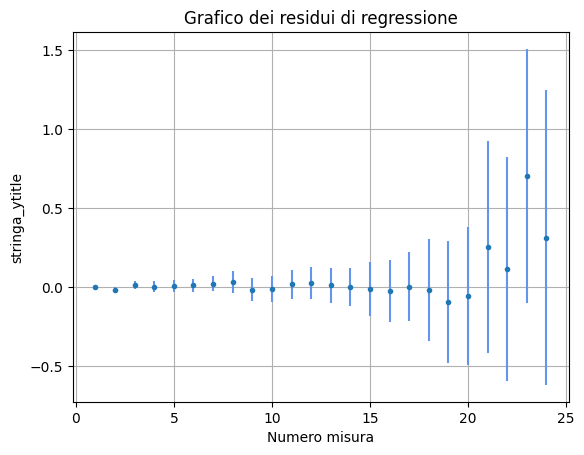

In [ ]:
chi_quadro_lineare(v_out_fit, v_in_fit, err_v_out_fit, -0.007735421348975979, 1.8628788266152025, "stringa_ytitle")

Grafico

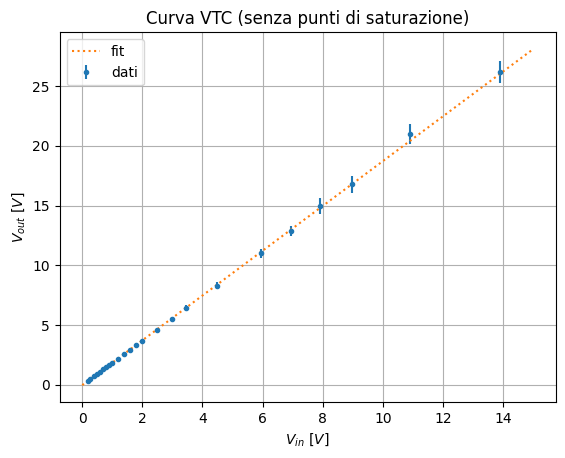

In [ ]:
#plt.figure(figsize=(8,6))
plt.errorbar(v_in_fit, v_out_fit, linestyle="", marker=".", yerr=err_v_out_fit, label="dati")
plt.grid()
plt.title("Curva VTC (senza punti di saturazione)")
plt.xlabel("$V_{in} \\ [V]$")
plt.ylabel("$V_{out} \\ [V]$")
plt.plot(np.linspace(0,15,80), retta_fit_xba(np.linspace(0,15,80), 1.8736887809668126, -0.011559525951847727), marker="", linestyle=":", label="fit")
plt.legend()

Grafico di tutti i punti

Text(0, 0.5, '$V_{out} \\ [V]$')

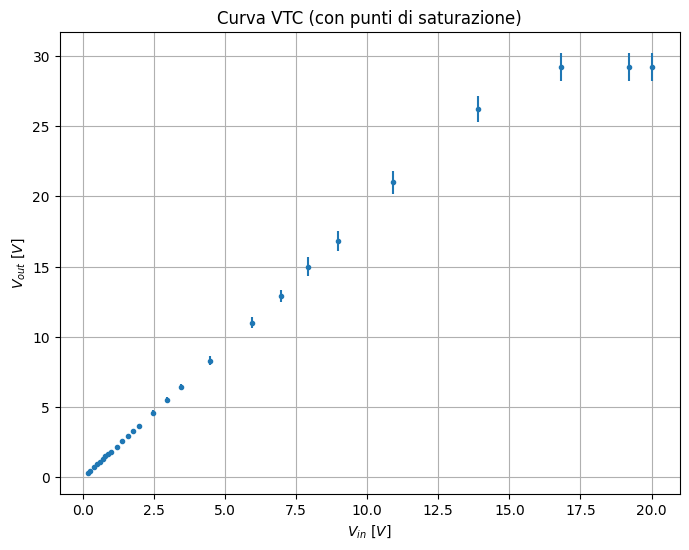

In [6]:
plt.figure(figsize=(8,6))
plt.errorbar(v_in, v_out, linestyle="", marker=".", yerr=err_v_out)
plt.grid()
plt.title("Curva VTC (con punti di saturazione)")
plt.xlabel("$V_{in} \\ [V]$")
plt.ylabel("$V_{out} \\ [V]$")

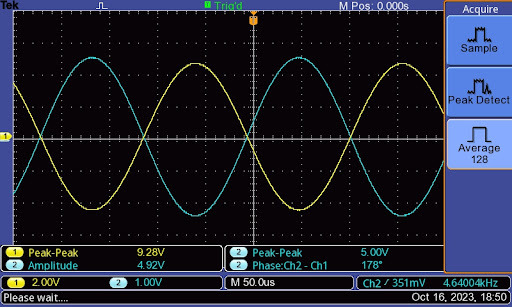

#Frequenza

In [7]:
#dati

frequenza = [0.1, 0.215, 0.464, 1, 2.15, 4.64, 10, 21.5, 46.4, 100, 215, 464, 1000, 2150, 4640  ]    #[kHz]
v_in = [5, 5, 5, 5, 5, 4.92, 4.92, 4.92, 4.96, 4.96, 4.96, 5.04, 5.08, 5.12, 5.16]                   #[V]
v_div_vin = [1, 1, 1, 1, 1, 1, 1, 1, 1,1,1,1,1,1,1 ]
v_out = [9.28, 9.28, 9.28, 9.28, 9.28, 9.12, 9.12, 9.12, 9.20, 9.20, 9.56, 9.28, 5.92, 2.42, 0.696]  #[V]
v_div_vout = [2, 2, 2, 2, 2, 2, 2, 2, 2,2,2,2,2,0.5, 0.1]

In [18]:
A = []
for i in range(len(v_in)):
  dummy = 20*math.log10(v_out[i]/v_in[i])
  A.append(dummy)

print("ampiezza [db]")
print(A, "\n")

#calcolo degli errori
err_A = []
for i in range(len(v_in)):
  dummy_err_vout = math.sqrt( ((1/10)*v_div_vout[i])**2 + ((3/100)*v_out[i])**2)
  print("err_vout:", dummy_err_vout)
  dummy_err_vin = math.sqrt( ((1/10)*v_div_vin[i])**2 + ((3/100)*v_in[i])**2 )
  print("err_vi:  ", dummy_err_vin)
  print("------------------------------")
  dummy_g = v_out[i]/v_in[i]
  dummy_err_g = dummy_g * math.sqrt( (dummy_err_vout/v_out[i])**2 + (dummy_err_vin/v_in[i])**2 )
  dummy_err_A = 20*(dummy_err_g / (dummy_g*math.log(20)))
  err_A.append(dummy_err_A)
print("\nErrori ampiezza")
print(err_A)

ampiezza [db]
[5.371559437656864, 5.371559437656864, 5.371559437656864, 5.371559437656864, 5.371559437656864, 5.3605947112211165, 5.3605947112211165, 5.3605947112211165, 5.366123017107157, 5.366123017107157, 5.699524315718052, 5.3023487954667345, 1.3291598887800098, -6.50909189990799, -17.400809240332986] 

err_vout: 0.342792298629943
err_vi:   0.18027756377319948
------------------------------
err_vout: 0.342792298629943
err_vi:   0.18027756377319948
------------------------------
err_vout: 0.342792298629943
err_vi:   0.18027756377319948
------------------------------
err_vout: 0.342792298629943
err_vi:   0.18027756377319948
------------------------------
err_vout: 0.342792298629943
err_vi:   0.18027756377319948
------------------------------
err_vout: 0.3389055325603286
err_vi:   0.1782856135530851
------------------------------
err_vout: 0.3389055325603286
err_vi:   0.1782856135530851
------------------------------
err_vout: 0.3389055325603286
err_vi:   0.1782856135530851
----------

Grafico

<ErrorbarContainer object of 3 artists>

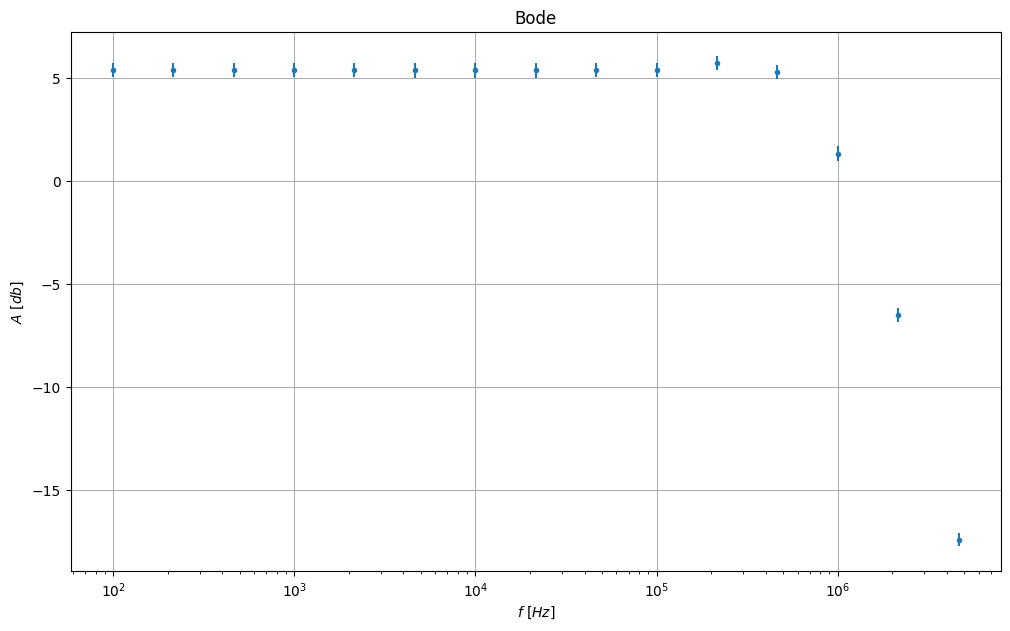

In [13]:
frequenza_hz = []
for i in frequenza:
  dummy = i*1000
  frequenza_hz.append(dummy)

plt.figure(figsize=(12,7))
plt.xscale("log", base=10)
plt.grid()
plt.title("Bode")
plt.xlabel("$f \\ [Hz]$")
plt.ylabel("$A \\ [db]$")
plt.errorbar(frequenza_hz, A, linestyle="", marker=".", yerr=err_A)